<a href="https://colab.research.google.com/github/SantiagoRodriguez8881/Metodos1_JuanPabloMartinez_SantiagoRodriguez/blob/La-ramita-del-snat/Ejercicio_7_interpolacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

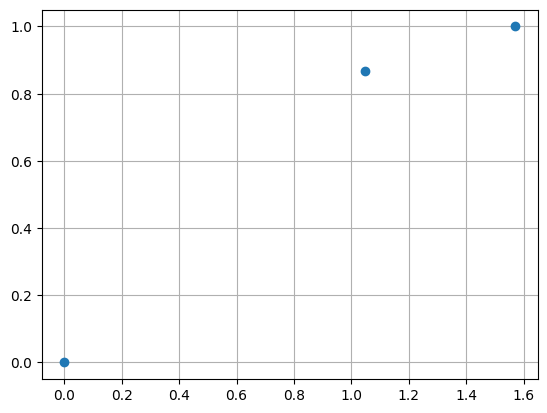

In [60]:
# EJERCICIO INTERPOLACION DE LAGRANGE
# 7: Aproximacion de la funcion sin(x)

# Vamos a importar las librerias que usemos

import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import math

def seno(x):
  return np.sin(x)

# (a)  Definimos nuestro conjunto de soporte y nuestra variable:

x = sym.Symbol('x', real = True)
X = np.array([0, np.pi/3, np.pi/2])
Y = np.array([np.sin(0), np.sin(np.pi/3), np.sin(np.pi/2)])

# Vamos a dibujar nuestro conjunto de soporte:

plt.plot(X,Y, 'o')
plt.grid()
plt.show()

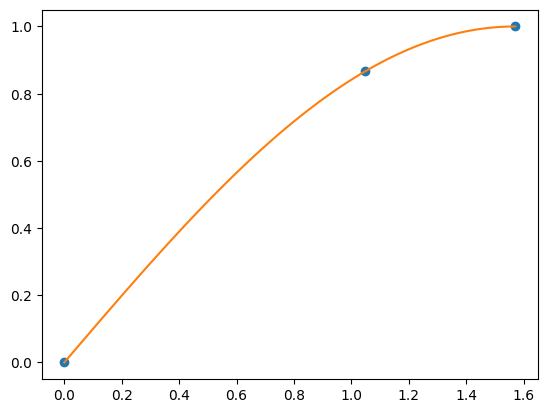

In [61]:
# (b)  Ahora vamos a dibujar el polinomio interpolador y e conjunto de soporte en el intervalo (0, pi/2):

# Creamos la funcion que sintetiza la productoria dentro de la interpolacion:
def Lagrange(x,X,i):

  L = 1
  for j in range(len(X)):
    if i != j:
      L *= (x-X[j])/(X[i]-X[j])
  return L

# Creamos la funcion que sintetiza la interpolacion de Lagrange:

def Interpolate(x,X,Y):

  Poly = 0
  for i in range(len(X)):
    Poly += Y[i]*Lagrange(x,X,i)
  return Poly

I = Interpolate(x,X,Y).expand()

# Definimos el conjunto de soporte entre 0 y pi/2:

X_new = np.linspace(0, np.pi/2,100)
plt.plot(X,Y, 'o')
plt.plot(X_new, np.sin(X_new), label = 'Funcion sin(x)')
plt.show()

In [62]:
# (c)  Ahora vamos a estimar el valor de sin(pi/8) usando el polinomio interpolador:

Estimacion = Interpolate(x,X,Y)

punto = np.pi/8

Estimacion = Estimacion.subs(x,punto)

print(Estimacion)

0.418208934443120


In [63]:
# (d)  Vamos a calcular el error de la estimacion:

Error = np.abs(np.sin(punto) - Estimacion)
print(Error)

# El error es del orden de 1e-2. El error de la estimacion concuerda con la esperada en el ejercicio

0.0355255020780303


In [64]:
# (e) Vamos a comparar el error con el valor teorico, usando la formula que está en las notas:

def Derivada4(x):
  return np.sin(x)

def formula_error_interpolacion(f,x,X):
  mul = 1
  for i in range(len(X)):
    mul *= (x-X[i])
  return (f*mul)/math.factorial(len(X))

Error_interpolacion = formula_error_interpolacion(Derivada4(punto),punto,X)
print(Error_interpolacion)

# Comparando el error de la estimacion con la formula general del error nos damos cuenta que hay una pequeña diferencia.
# Nos damos cuenta ambos valores viven en el mismo orden de magnitud.


0.019312481095180297
